In [1]:
__author__ = "Miguel Solinas ","Elvin Ugonna"
__credits__ = "Miguel Solinas ","Elvin Ugonna"
__version__ = "0.1.0"
__maintainer__ = "Miguel Solinas Jr.","Elvin Ugonna"
__email__ = "migue.solinas@gmail.com","elvindavin@gmail.com"
__status__ = "Project"

In [2]:
#importing libraries
import pandas as pd
import numpy as np

In [3]:
#open dataset
file = pd.read_csv("data1.csv")
dataset = pd.DataFrame(file)

dataset.dtypes

type           int64
time         float64
sender         int64
messageID      int64
pos/0        float64
pos/1        float64
pos/2        float64
spd/0        float64
spd/1        float64
classs         int64
dtype: object

In [4]:
dataset.describe()

,type,time,sender,messageID,pos/0,pos/1,pos/2,spd/0,spd/1,classs
count,4029.0,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4.029000e+03,4.029000e+03,4029.000000,4029.000000
mean,4.0,18050.008896,236.864483,134793.972946,4719.204751,5571.488144,1.895000e+00,1.797976e+00,-1.060090,1.846612
std,0.0,28.807848,151.330926,75782.566687,1089.826240,258.697882,1.934249e-13,8.136849e+00,18.057582,0.360406
min,4.0,18000.006320,7.000000,153.000000,2331.525684,5180.351961,1.895000e+00,-1.712646e+01,-43.874673,1.000000
25%,4.0,18024.733440,103.000000,70699.000000,3613.652104,5313.817688,1.895000e+00,-1.791909e+00,-6.191417,2.000000
50%,4.0,18049.699190,217.000000,138293.000000,4426.073097,5562.989770,1.895000e+00,8.530000e-15,0.000000,2.000000
75%,4.0,18074.727730,361.000000,201806.000000,5936.455077,5778.752997,1.895000e+00,5.579280e+00,2.175522,2.000000
max,4.0,18099.997670,601.000000,260739.000000,6324.850321,6080.031981,1.895000e+00,3.682722e+01,41.408049,2.000000


 1) Some of the featues do not deliver major information

 2) The feature type is usefull, it is always one value (4)

 3) Pos/2 is not correlated to any feature and it does not change along the samples it is always close to one value
 
 4) I can not ensure if there is an correlation between the feature class and the rest ot the features 



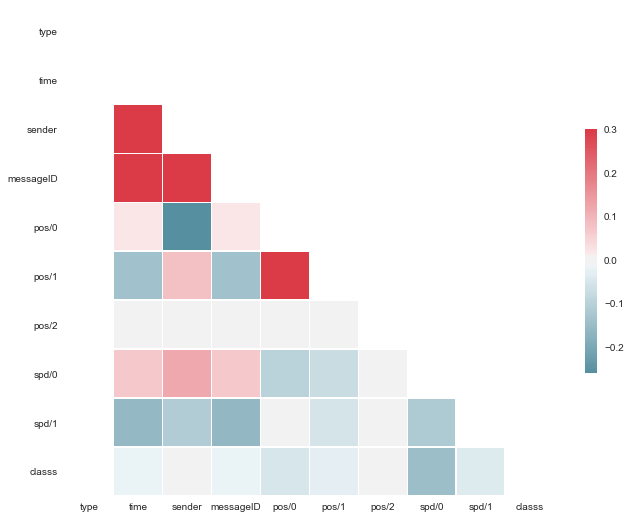

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white")

# Generate a large random dataset


# Compute the correlation matrix
corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})




print(" 1) Some of the featues do not deliver major information\n") 
print(" 2) The feature type is usefull, it is always one value (4)\n")
print(" 3) Pos/2 is not correlated to any feature and it does not change along the samples it is always close to one value\n ")
print(" 4) I can not ensure if there is an correlation between the feature class and the rest ot the features \n")

In [13]:
#  Descrpition:
#  Set of normalization functions
#  Normalize each columns of the dataset, this function accept a normalize function like argument (lambda : function()).
#  Args:
#   dataframe: pandas DataFrame of features
#   Normalize function: function to be implemented to normalize the dataset
#  Returns:
#    A version of the input `DataFrame` that has all its features normalized following the specified function.

def linear_scale(series):
  min_val = series.min()
  max_val = series.max()
  scale = (max_val - min_val) / 2.0
  return series.apply(lambda x:((x - min_val) / scale) - 1.0)

def z_score_normalize(series):
  mean = series.mean()
  std_dv = series.std()
  return series.apply(lambda x:(x - mean) / std_dv)

def get_quantile_based_boundaries(feature_values, num_buckets):
  boundaries = np.arange(1.0, num_buckets) / num_buckets
  quantiles = feature_values.quantile(boundaries)
  return [quantiles[q] for q in quantiles.keys()]

def feature_normalize(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset - mu)/sigma

def min_max(dataset):
    mu = np.mean(dataset,axis=0)
    max_ = np.max(dataset)
    min_ = np.min(dataset)
    return (dataset - mu)/(max_-min_)



In [14]:
# We need to split the dataset into three (validation, training and testing)
# They must to be the same everytime, we can respect that by choosing a random seed (in this case 1)

def split_dataset (dataframe,validation=False,seed=1):
    np.random.seed(seed) 
    mask1 = np.random.randn(len(dataframe))>0.7
    training = dataframe[mask1]
    no_training = dataframe[~mask1]
    if validation :
        mask2 = np.random.randn(len(no_training))>0.5
        validation = no_training[mask2]
        testing = no_training[~mask2] # ~ gives the complement of a binary chipher from 0100 to 1011 (https://data-flair.training/blogs/python-operator/)
        return training, validation, testing
    else:
        print("validation equals to testing")
        return training, no_training,no_training
    
    

In [15]:
from tensorflow.python.data import Dataset
#The tf.data API enables you to build complex input pipelines from simple, reusable pieces


class dataset_setup ():

    def __init__(self,features,targets):
        self.allDataset_features = None
        self.allDataset_targets = None
        self.training_features = None
        self.training_targets = None
        self.validation_features = None
        self.validation_targets= None
        self.testing_features = None
        self.testing_targets= None
        self.targets= targets
        self.features= features
        self.targets_aux= None
        self.features_aux= None
        
    def input_data(self,path_file,sep=',',header = 0):
        
        dataset_original = pd.read_csv(path_file, sep=sep, header=header)
#         pd.options.display.float_format = '{:.4f}'.format
        
        dataset = pd.DataFrame(dataset_original.reindex(
            np.random.permutation(dataset_original.index)))
        
        #Normalization
        dataset[features] = min_max(dataset[features]) # we need to normalize just the features not the labels
        #Splitting dataset into three subsets    
        ds_training, ds_validation, ds_testing = split_dataset(dataset,validation =True)
        #All dataset features and targets
        self.allDataset_features = dataset[self.features]
        self.allDataset_targets = dataset[self.targets]
        #Training dataset
        self.training_features = ds_training[self.features]
        self.training_targets = ds_training[self.targets]
        #Validation dataset
        self.validation_examples =  ds_validation[self.features]
        self.validation_targets = ds_validation[self.targets]
        #Testing dataset
        self.testing_examples = ds_testing[self.features]
        self.testing_targets = ds_testing[self.targets]
        

# Name: 
#  pipeline_feeder
# Description:
#  The function will receive a couple of features/targets (dataframes) that will be splitted into a specific
#  number of epoch. Each epoch will containt as samples as the batchsize specified.
# Args:
#  features
#   type  -> DataFrame
#   features -> It is expected a dataframe with the columns of the features and the respective data 
#   targets  -> It is expected a dataframe with the labels. labels can be coded in one-hote or discrete 
#           -> n° labels = n° targets  they must contain the same index position (Sample 1 feature -> sample 1 target) 
#  Batch_size:
#   type  -> Integer
#   It defines the size of the batch, if batch_size is None the dataset will not be splitted (Batch gradient vs mini-batch (S.G.D))
#  Features_aux:
#   type  -> DataFrame
#   Extra features to be splitted if it is required 
#  targets_aux:
#   type  -> DataFrame
#   Extra target to be splitted if it is required # shuffle
#  Shuffle:
#   type  -> Boolean
#   The batch can be shuffled to increase randomization
#  num_epochs:
#   type  -> Integer
#   It defines the times that a batch must be loaded in memory
# Returns:
#  A  couple of target/features iterators

    def pipeline_feeder(self,features, targets, batch_size,features_aux= None,targets_aux=None, shuffle = False, num_epochs=None):


        # warning: 2GB limit
        if features_aux is not None: 
            features_new = [features,features_aux] #we create a list containing extra features or extra targets
            features = pd.concat(features_new,1) #we concatenate the extra information with the original one alongisde index 1 
        elif targets_aux is not None:
            targets_new = [features,features_aux]
            target = pd.concat(targets_new,1)

        ds = Dataset.from_tensor_slices((features, targets))  # We call dataset function from the API data that allow us to create
                                                              # tensor objects to feed the computational graph.

        # Shuffle the data, if specified
        if shuffle:
            ds = ds.shuffle(10000)

        if batch_size == 0:
            ds = ds.batch(features.shape[0]).repeat(num_epochs)
        else:
            ds = ds.batch(batch_size).repeat(num_epochs)

        # Return the next batch of data
        features, labels = ds.make_one_shot_iterator().get_next()

        # labels= tf.reshape(labels,shape=(batch_size,1))
        return features, labels
        # return ds.make_one_shot_iterator()

        
        
    def get_training_batch(self,batch_size,num_epochs):

        training_batch = self.pipeline_feeder(self.training_features,
                                           self.training_targets,
                                                   batch_size=batch_size,
                                                   num_epochs=num_epochs,
                                                   shuffle=True )
        return training_batch

    def get_testing_batch(self,num_epochs,features):
        testing_batch =  self.pipeline_feeder(self.testing_features,
                                                   self.testing_targets,
                                                           num_epochs=num_epochs,
                                                           batch_size=self.testing_targets.shape[0], # All the testing set
                                                           shuffle=False)
        return testing_batch

    
    def get_validation_batch(self,num_epochs,features):
        validation_batch =  self.pipeline_feeder(self.validation_features,
                                                   self.validation_targets,
                                                           num_epochs=num_epochs,
                                                           batch_size=self.validation_targets.shape[0], # All the validation set
                                                           shuffle=False)
        return validation_batch
    
    def get_all_dataset(self,features):
        dataset_batch = self.pipeline_feeder(self.allDataset_labels,
                                                             self.allDataset_targets,
                                                             num_epochs=1,
                                                             batch_size=self.dataset_targets.shape[0],
                                                             shuffle=False)

        return dataset_batch




C:\Users\Maturrin\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [16]:
features= [ 'time', 'pos/0', 'pos/1','spd/0', 'spd/1']
features_aux= [ 'type', 'sender', 'messageID', 'pos/2','spd/0', 'spd/1', 'pos/2']
# Most of the features are discrete and do not represent continous values
# There is one exception with pos/2 that is continous, however it does not change, it can be eliminated 

targets= ['classs']


In [17]:
dataset = dataset_setup(features,targets)

In [18]:
dataset.input_data("data1.csv")

In [19]:
features,target = dataset.get_training_batch(1,10)
import tensorflow as tf

sess =  tf.InteractiveSession()
for i in range(10 ) : print(sess.run(features))
sess.close()

[[-0.09310511  0.3984502   0.41119195 -0.07256422  0.16645936]]
[[-0.30979395 -0.28374736  0.15388677 -0.05950925  0.40878658]]
[[-0.37061752 -0.46468391 -0.14429505  0.17909054 -0.04140457]]
[[ 0.00920744 -0.30661998 -0.41210468  0.19215089  0.04040154]]
[[-0.22233169 -0.27446064 -0.19570528  0.03144234 -0.31838769]]
[[ 0.09365574  0.20578089 -0.27396306  0.19045812 -0.05230638]]
[[ 0.21766957 -0.02692034 -0.25160224 -0.03332444  0.0124303 ]]
[[-0.23093383  0.2430588   0.28480223  0.23531383  0.00244814]]
[[-0.26649701 -0.28076037  0.54815042  0.02898614  0.38548511]]
[[-0.18906261 -0.28246713  0.31275876 -0.03372763 -0.42582719]]
